In [27]:
pip install pyforest

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pyforest
import pandas as pd
import numpy as np


In [29]:
df = pd.read_csv(r'C:/Users/Anisha/Downloads/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
df.shape

(20640, 10)

In [32]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

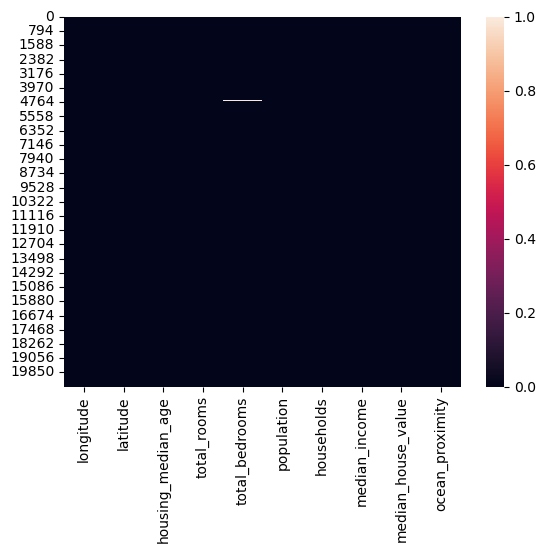

In [33]:
sns.heatmap(df.isnull())
plt.show()

In [34]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Feature Extraction

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Anisha\AppData\Local\Temp\ipykernel_22792\3198834418.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['housing_median_age'],color='b')


<IPython.core.display.Javascript object>

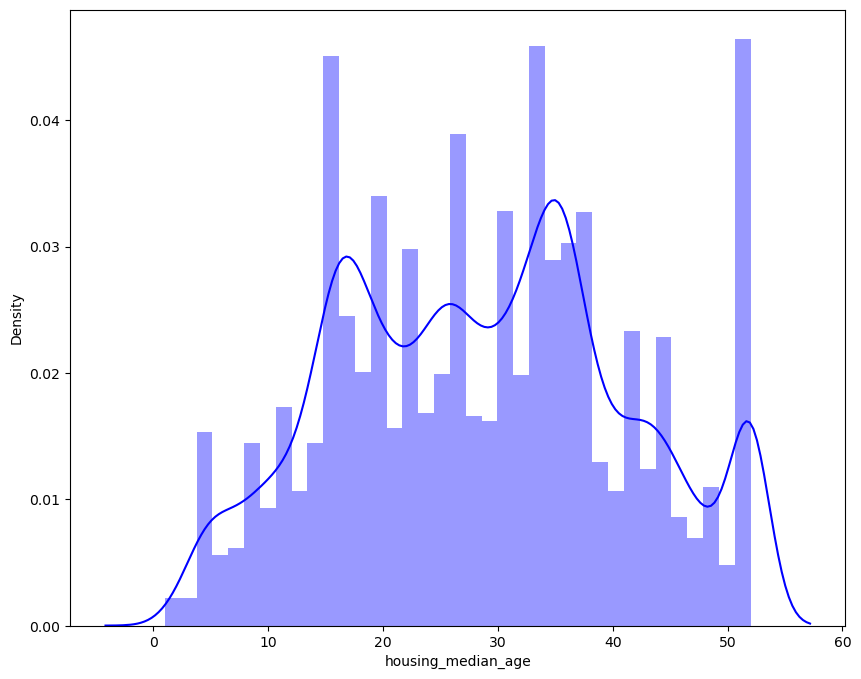

Housing median Age-MIN: 1.0
Housing median Age-MAX: 52.0


In [35]:
plt.figure(figsize =(10,8))
sns.distplot(df['housing_median_age'],color='b')
plt.show()
print('Housing median Age-MIN:' , df['housing_median_age'].min())
print('Housing median Age-MAX:' , df['housing_median_age'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Anisha\AppData\Local\Temp\ipykernel_22792\3663102957.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['population'],color='g')


<IPython.core.display.Javascript object>

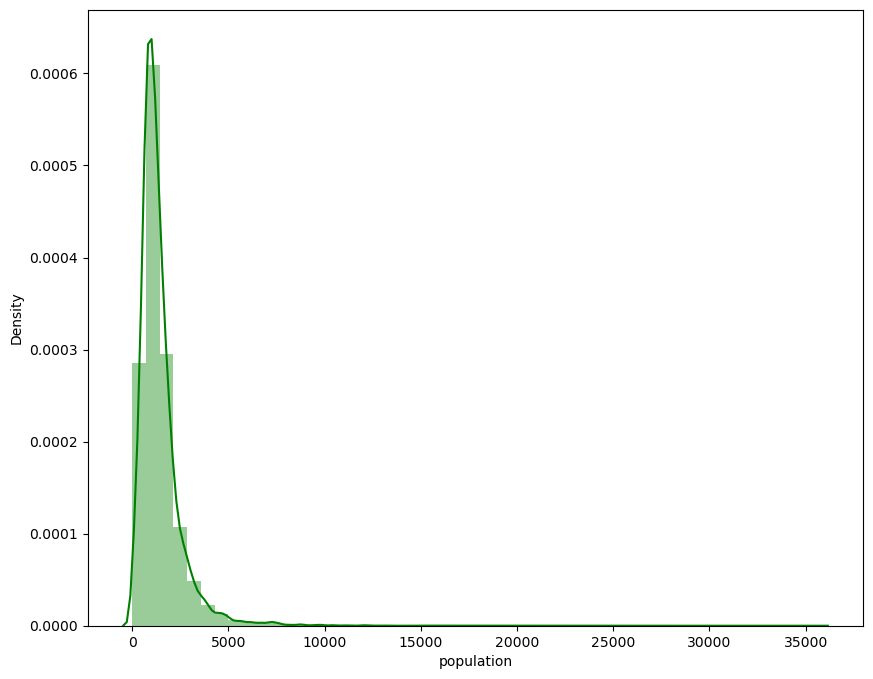

Population-MIN: 3.0
Population-MAX: 35682.0


In [36]:
plt.figure(figsize=(10,8))
sns.distplot(df['population'],color='g')
plt.show()
print('Population-MIN:' , df['population'].min())
print('Population-MAX:' , df['population'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Anisha\AppData\Local\Temp\ipykernel_22792\632355736.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_income'],color='y')


<IPython.core.display.Javascript object>

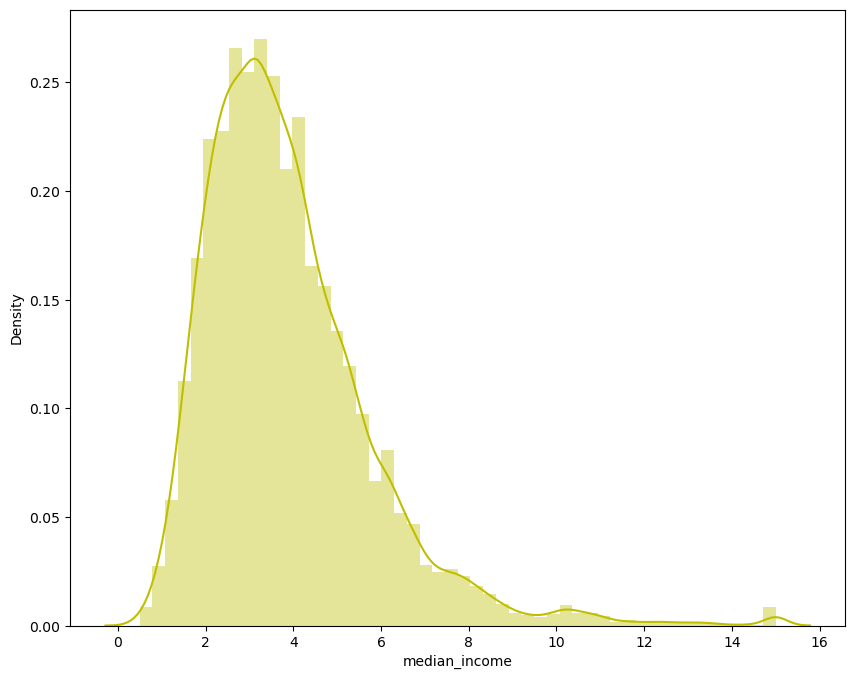

Median_Income-MIN: 0.4999
Median_Income-MAX: 15.0001


In [37]:
plt.figure(figsize=(10,8))
sns.distplot(df['median_income'],color='y')
plt.show()
print('Median_Income-MIN:' , df['median_income'].min())
print('Median_Income-MAX:' , df['median_income'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Anisha\AppData\Local\Temp\ipykernel_22792\3643353704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['households'],color='r')


<IPython.core.display.Javascript object>

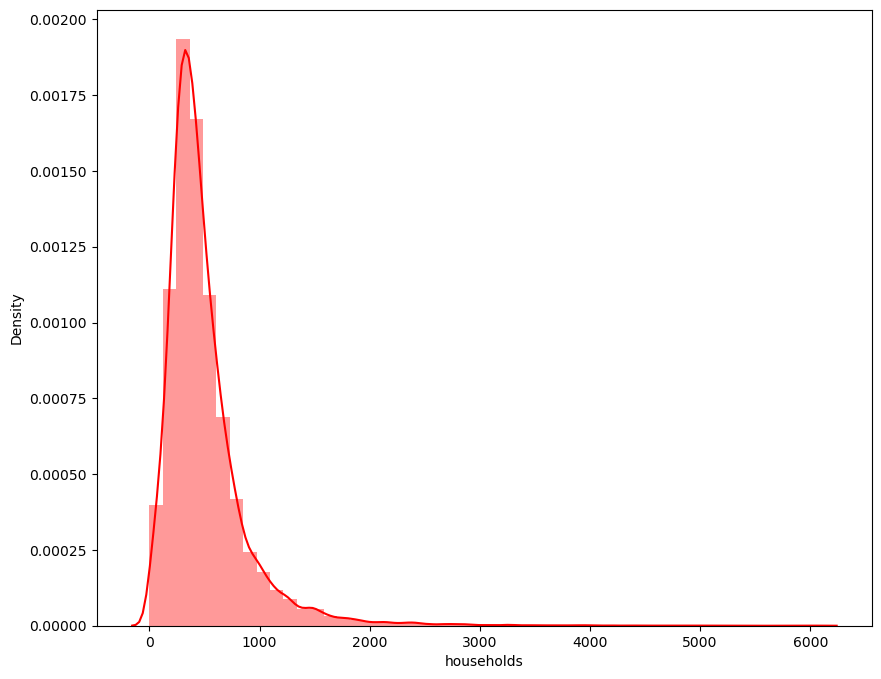

Households-MIN: 1.0
Households-MAX: 6082.0


In [38]:
plt.figure(figsize=(10,8))
sns.distplot(df['households'],color='r')
plt.show()
print('Households-MIN:' , df['households'].min())
print('Households-MAX:' , df['households'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Anisha\AppData\Local\Temp\ipykernel_22792\3359374282.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_rooms'],color='g')


<IPython.core.display.Javascript object>

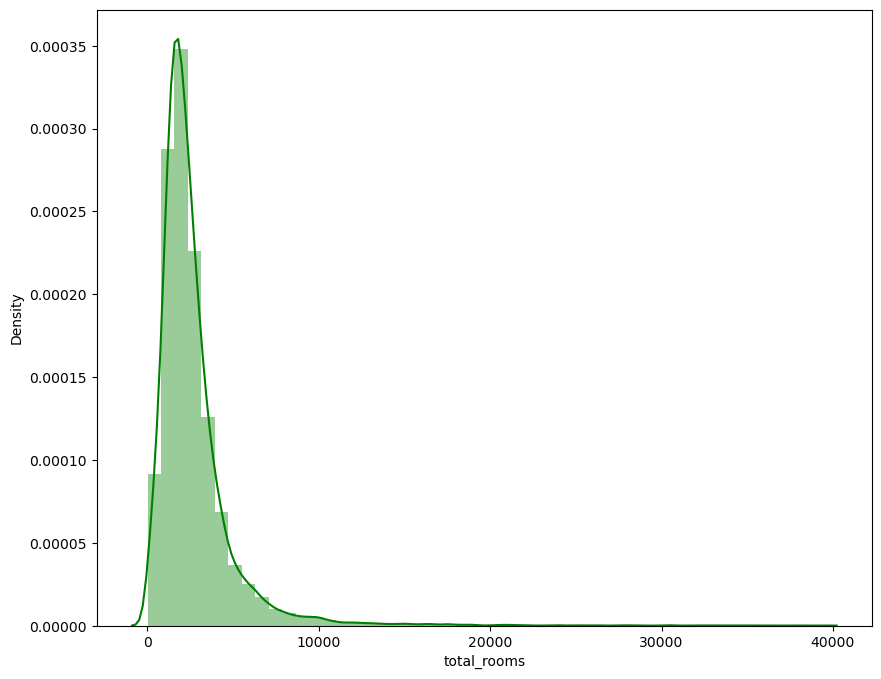

Total_rooms-MIN: 2.0
Total_rooms-MAX: 39320.0


In [39]:
plt.figure(figsize=(10,8))
sns.distplot(df['total_rooms'],color='g')
plt.show()
print('Total_rooms-MIN:' , df['total_rooms'].min())
print('Total_rooms-MAX:' , df['total_rooms'].max())

<IPython.core.display.Javascript object>

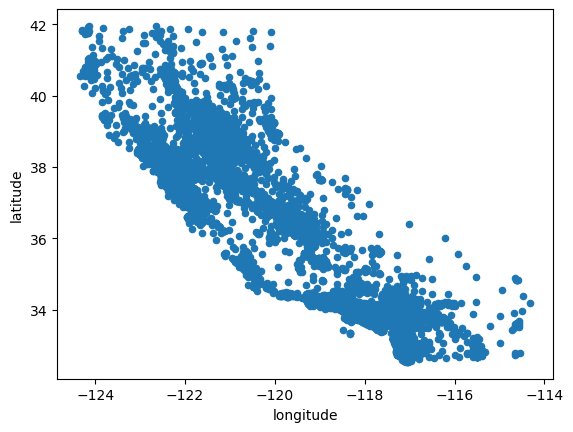

In [40]:
df.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

<IPython.core.display.Javascript object>

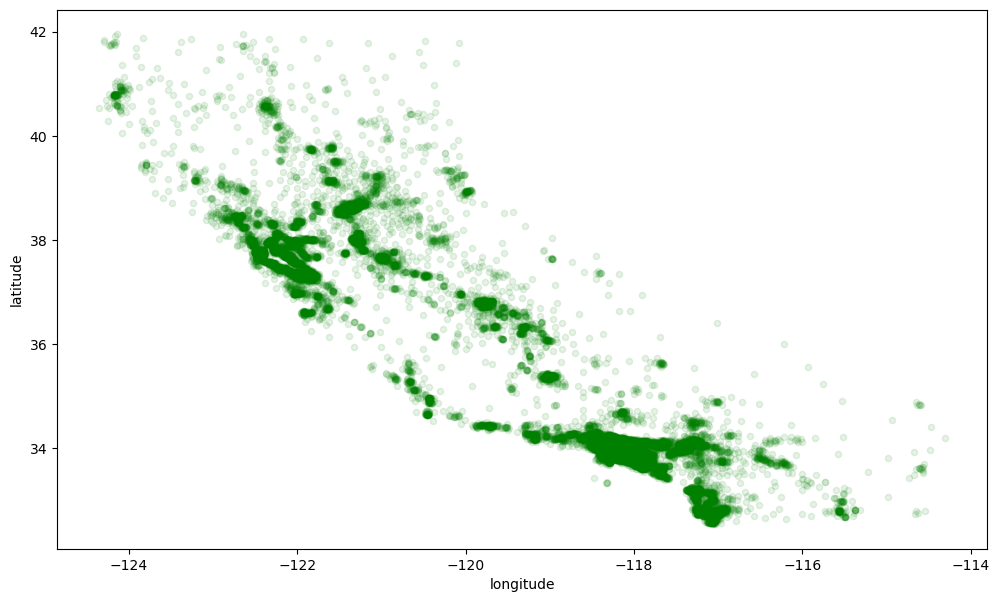

In [41]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,color='g' ,figsize=(12,7))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

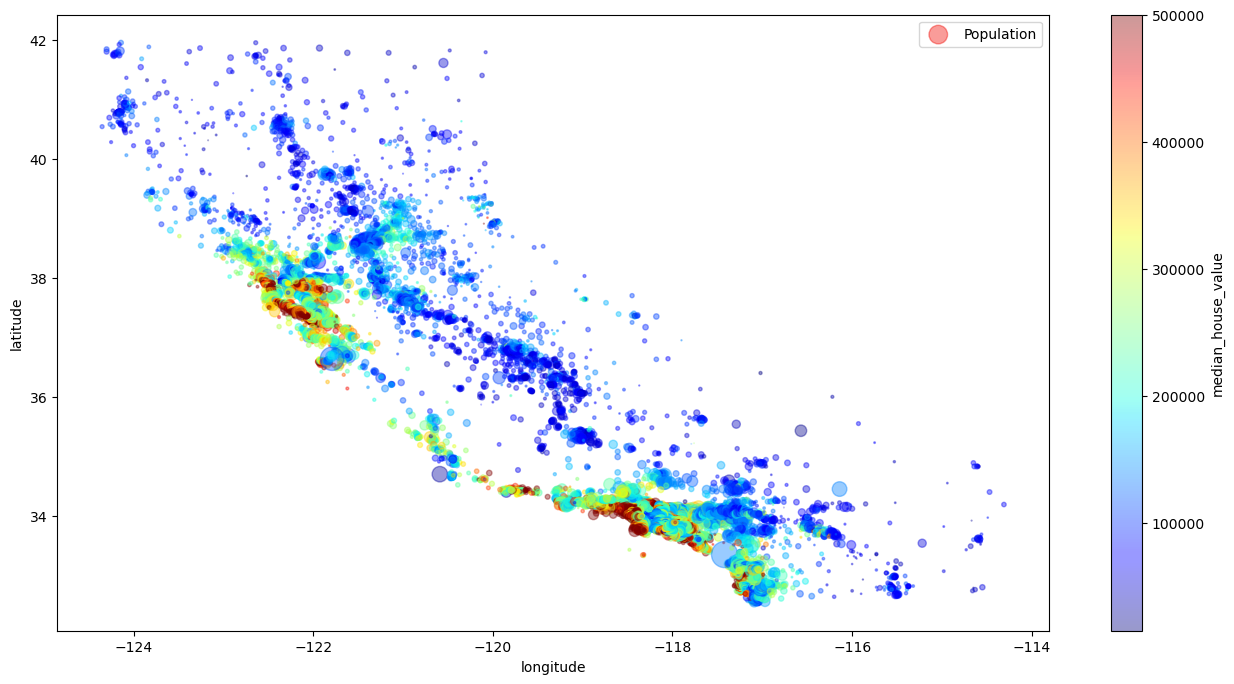

In [42]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100,
        label='Population',
        c='median_house_value',
        cmap= plt.get_cmap('jet'),colorbar=True , figsize=(16,8)
       )
plt.legend()
plt.show()
        

In [43]:
corr_matrix = df.corr() #correlation between thefeatures

C:\Users\Anisha\AppData\Local\Temp\ipykernel_22792\2896892538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr() #correlation between thefeatures


In [44]:
corr_df = corr_matrix['median_house_value'].sort_values(ascending= False)
corr_df

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

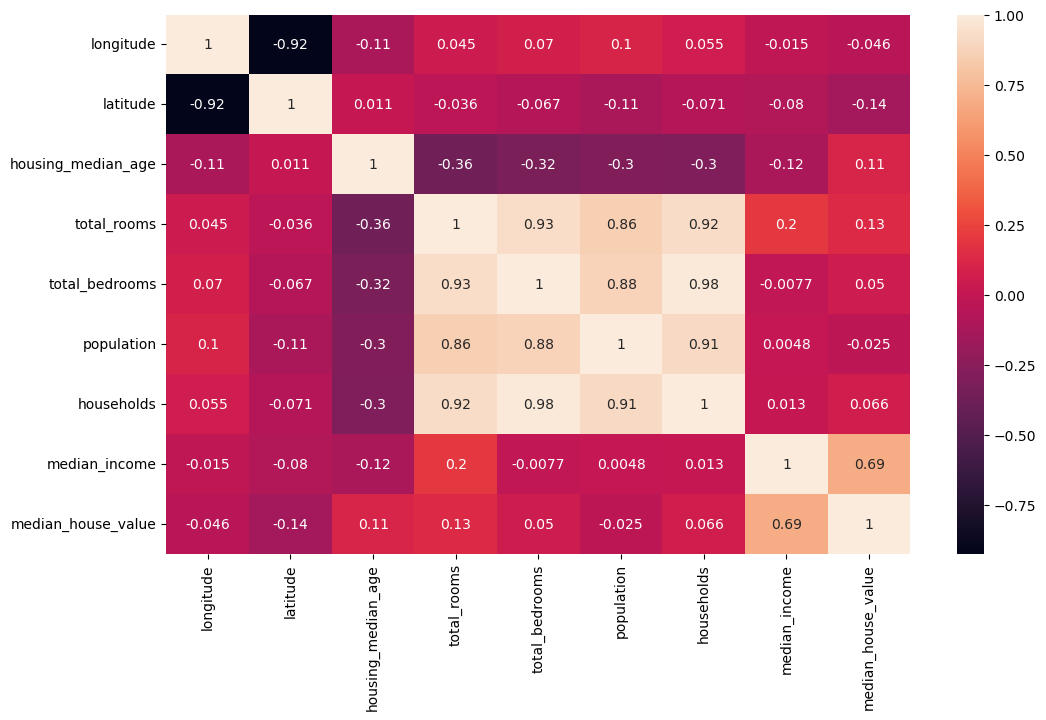

In [45]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot = True)
plt.show()

<IPython.core.display.Javascript object>

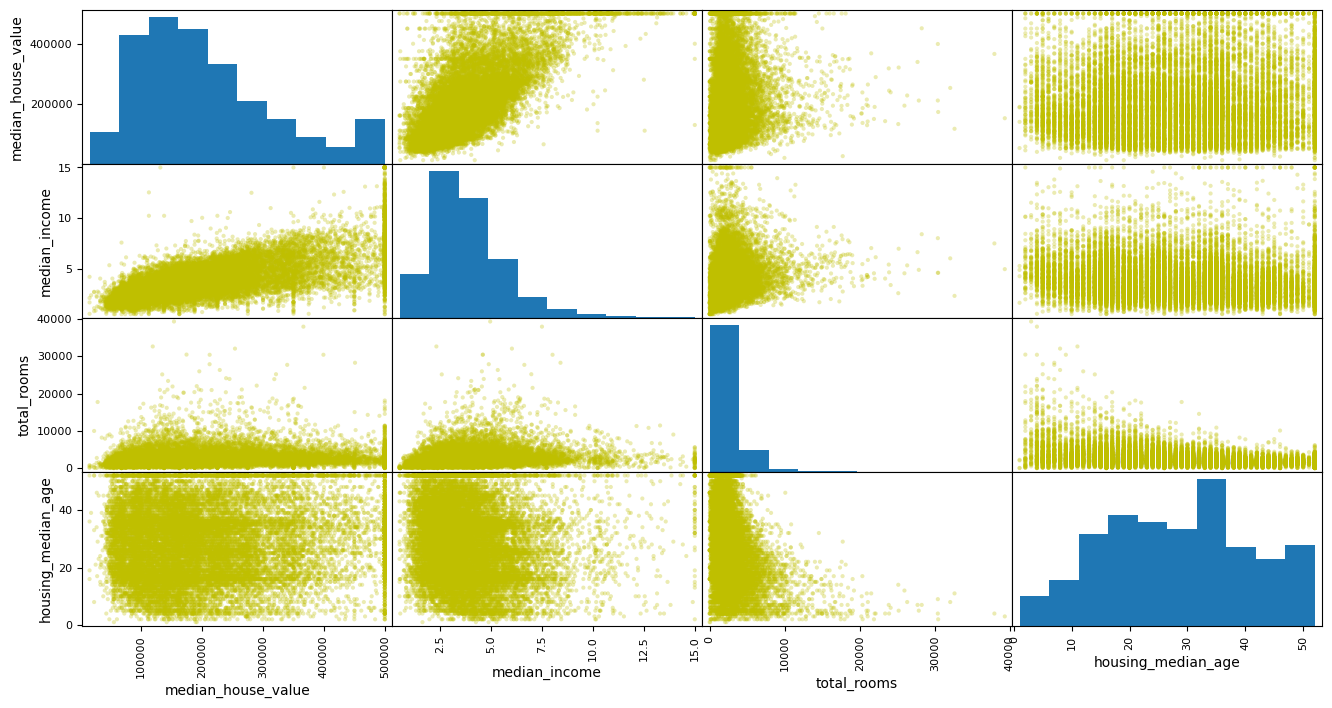

In [46]:
from pandas.plotting import scatter_matrix

attr =[ 'median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attr],figsize=(16,8),color='y' , alpha=0.3)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1600x800 with 0 Axes>

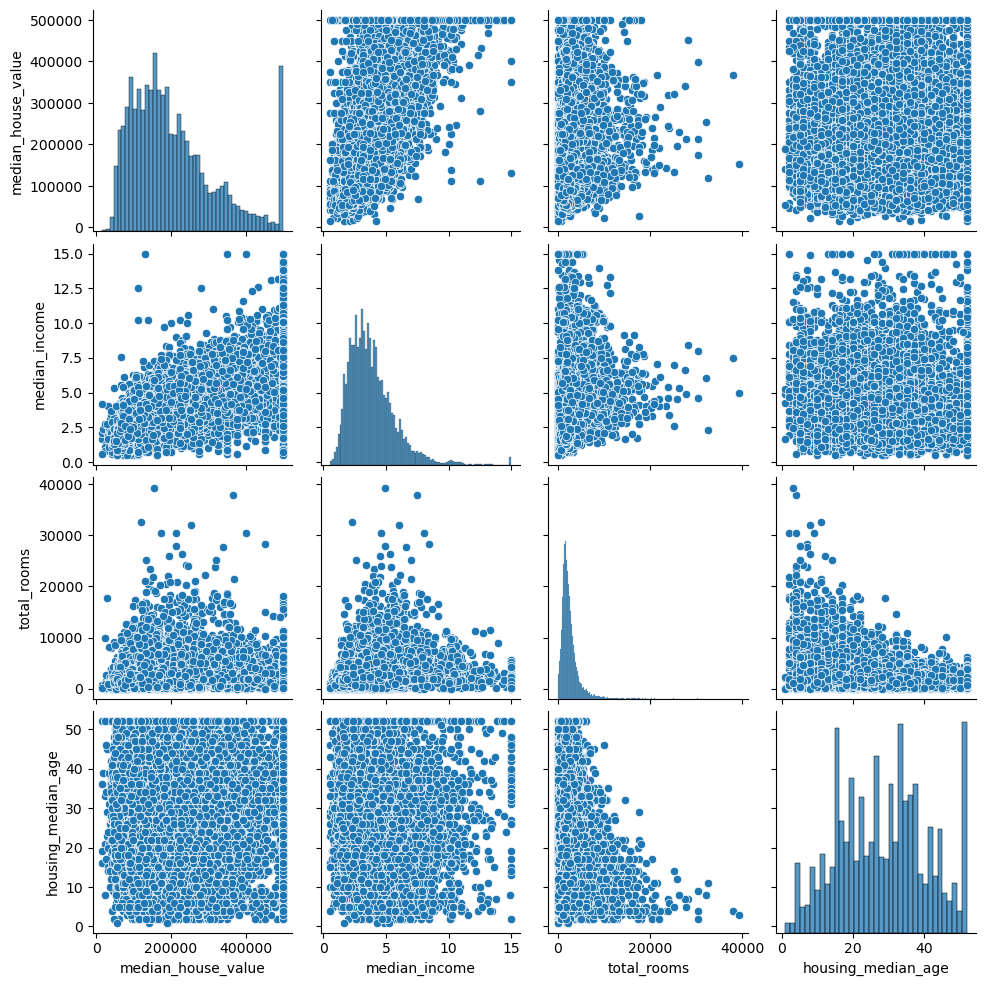

In [47]:
plt.figure(figsize=(16,8))
sns.pairplot(df[attr])
plt.show()


<IPython.core.display.Javascript object>

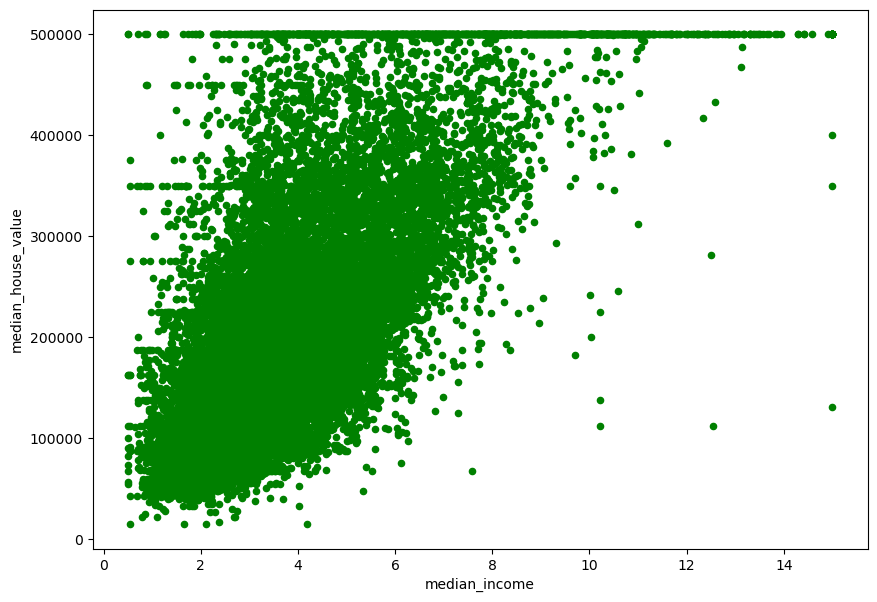

In [48]:
df.plot(kind='scatter', x='median_income', y='median_house_value',c='g', figsize=(10,7))
plt.show()

HANDLING CATEGORICAL VALUES

In [49]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [50]:
pd.get_dummies(df['ocean_proximity']).head(3)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0


In [51]:
dummy =pd.get_dummies(df['ocean_proximity'])

In [52]:
dummy.drop('ISLAND', axis=1, inplace= True)

In [53]:
dummy.head(2)

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0


In [54]:
df.merge(dummy, left_index =True , right_index= True).isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [55]:
df['<1H OCEAN']= dummy['<1H OCEAN'].values
df['INLAND']= dummy['INLAND'].values
df['NEAR BAY']= dummy['NEAR BAY'].values
df['NEAR OCEAN']= dummy['NEAR OCEAN'].values

In [56]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0


In [57]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.impute import SimpleImputer

In [59]:
train_ft =df.drop(['ocean_proximity', 'median_house_value'],axis=1)

In [60]:
imputer = SimpleImputer(strategy='median')
imputer.fit(train_ft)

SimpleImputer(strategy='median')

In [61]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [62]:
train_ft.median().values

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [63]:
x= imputer.transform(train_ft)

In [64]:
train_new_set = pd.DataFrame(x,columns = train_ft.columns)
train_new_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0


In [65]:
train_new_set.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [66]:
train_new_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0


In [67]:
train_new_set.shape

(20640, 12)

In [68]:
train_new_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   <1H OCEAN           20640 non-null  float64
 9   INLAND              20640 non-null  float64
 10  NEAR BAY            20640 non-null  float64
 11  NEAR OCEAN          20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [69]:
df.shape

(20640, 14)

In [70]:
train_new_set.shape

(20640, 12)

In [71]:
x=train_new_set.values
y=df['median_house_value']


Split The Data

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=2020)

In [74]:
x_train.shape

(16512, 12)

In [75]:
y_test.shape

(4128,)

In [76]:
x_test.shape

(4128, 12)

Model Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [79]:
predictions = lr.predict(x_test[:10])
predictions

array([238609.32131211, 381306.38850168, 257314.61040084, 131301.84992785,
       185894.87077418, 539843.34729246, 125404.98781123, 441654.60911985,
       160118.94728117, 201143.53254885])

In [80]:
y_train[:10]

14422    244400.0
13631     89200.0
18479    300800.0
5162      89700.0
3653     233700.0
6235     191700.0
8561     339700.0
6184     165700.0
1788      79400.0
17035    360500.0
Name: median_house_value, dtype: float64

In [81]:
data = {'Predicted':predictions, 'Actual':y_test[:10].values,'Diff':(predictions-y_train[:10].values)}
error_df=pd.DataFrame(data= data)
error_df

,Predicted,Actual,Diff
0,238609.321312,235000.0,-5790.678688
1,381306.388502,386800.0,292106.388502
2,257314.610401,286400.0,-43485.389599
3,131301.849928,120100.0,41601.849928
4,185894.870774,114200.0,-47805.129226
5,539843.347292,500001.0,348143.347292
6,125404.987811,68700.0,-214295.012189
7,441654.609120,500001.0,275954.609120
8,160118.947281,134100.0,80718.947281
9,201143.532549,143000.0,-159356.467451


Model Evaluation

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
pred = lr.predict(x_test)

In [84]:
mse= mean_squared_error(y_test, pred)
np.sqrt(mse)

69054.16722186211

In [85]:
mae= mean_absolute_error(y_test, pred)
mae

49951.60194054467

In [86]:
r2 = r2_score(y_test , pred )
r2

0.6480496434632266

Train

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error", cv=7)
rmse_Score = np.sqrt(-scores)

In [89]:
rmse_Score

array([72621.79441242, 67242.31772911, 68660.20243882, 72185.38018966,
       69007.11068751, 65440.27422308, 66543.76483304])

In [90]:
rmse_Score.mean()

68814.40635909127